<center>
    <b> <font size = 6, color = #e4b414>
    IMDb Top 100 Movies

<b/>
<center/>

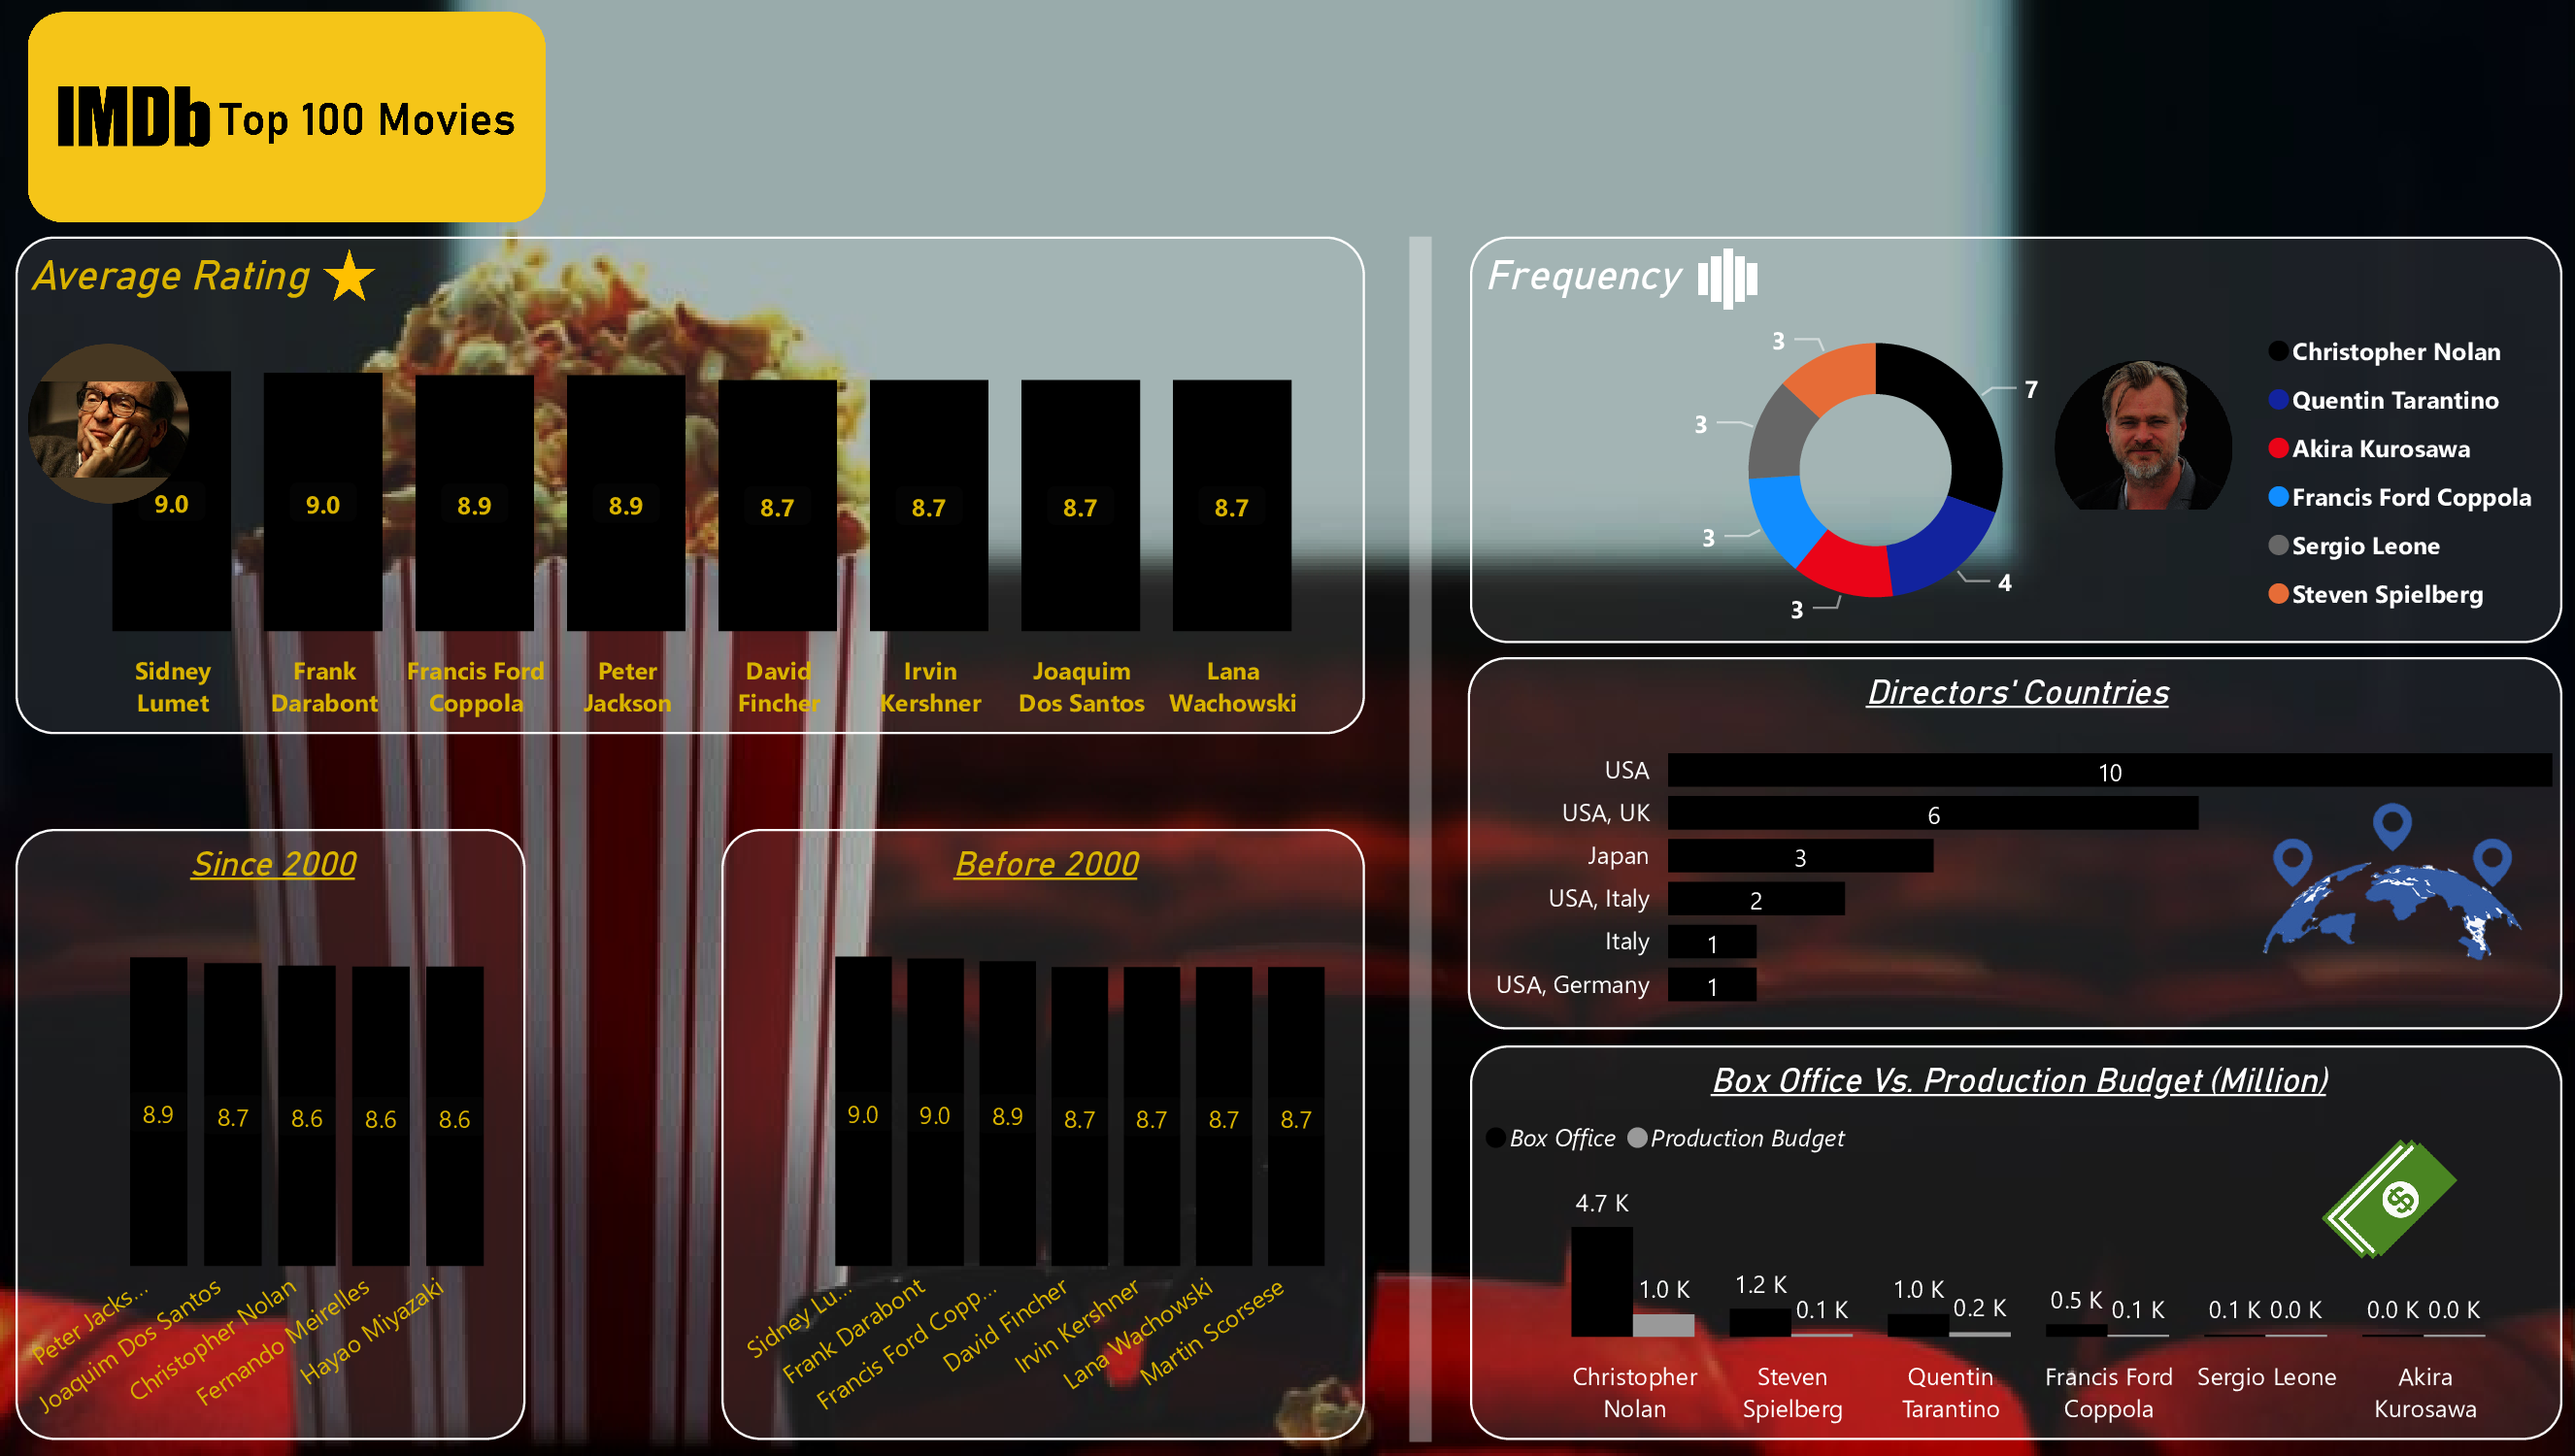

In [321]:
from IPython.display import display, Image
display(Image('IMDbTop100PowerBIReport.png'))

## Summary

## Libraries and Modules

In [207]:
# Webscraping and pattern matching
from seleniumwire import webdriver
from selenium.webdriver.common.by import By
import regex as re
import json
import requests

# Data manipulation 
import pandas as pd
import numpy as np
import sqlite3

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import statsmodels.api as sm

# Omitting warnings
from warnings import filterwarnings as fw
fw('ignore')

## Web Scraping

In [3]:
# url address containing the data to be scraped

url = 'https://www.imdb.com/chart/top/'

In [20]:
# Webdriver instance for Edge browser

driver = webdriver.Edge()

In [21]:
# Getting to the url address page

driver.get(url)

In [22]:
# Request response from the page

if driver.requests[0].response.status_code == 200:
    print('Success')
else: 
    print(f'Error: {driver.requests[0].response.status_code}')

Error: 302


In [23]:
# Content type

driver.requests[0].response.headers.get('content-type')

In [24]:
# Title of the page

driver.title

'IMDb Top 250 Movies'

In [25]:
# Getting the body of the page

body = driver.execute_script("return document.querySelector('body');")

In [26]:
# Printing the body of the page

imdb_250_info = body.text
imdb_250_info

"All\nSign In\nUse app\nIMDb Charts\nShare\nIMDb Top 250 Movies\nAs rated by regular IMDb voters.\n250 Titles\nSort by\nRanking\nRanking\nIMDb rating\nRelease date\nNumber of ratings\nAlphabetical\nPopularity\nRuntime\n1. The Shawshank Redemption\n1994\n2h 22m\nR\n9.3\n (3M)\nRate\n2. The Godfather\n1972\n2h 55m\nR\n9.2\n (2.1M)\nRate\n3. The Dark Knight\n2008\n2h 32m\nPG-13\n9.0\n (2.9M)\nRate\n4. The Godfather Part II\n1974\n3h 22m\nR\n9.0\n (1.4M)\nRate\n5. 12 Angry Men\n1957\n1h 36m\nApproved\n9.0\n (890K)\nRate\n6. The Lord of the Rings: The Return of the King\n2003\n3h 21m\nPG-13\n9.0\n (2M)\nRate\n7. Schindler's List\n1993\n3h 15m\nR\n9.0\n (1.5M)\nRate\n8. Pulp Fiction\n1994\n2h 34m\nR\n8.9\n (2.3M)\nRate\n9. The Lord of the Rings: The Fellowship of the Ring\n2001\n2h 58m\nPG-13\n8.9\n (2.1M)\nRate\n10. The Good, the Bad and the Ugly\n1966\n2h 58m\nR\n8.8\n (828K)\nRate\n11. Forrest Gump\n1994\n2h 22m\nPG-13\n8.8\n (2.3M)\nRate\n12. The Lord of the Rings: The Two Towers\n2002\n

In [27]:
# Matches of movies titles

pattern_titles = re.compile(r"\d{1,3}\.\s\K[\w\d\s.—,?!:·'-]+\d{4}", re.M)
matches_titles = pattern_titles.finditer(imdb_250_info)

for match in matches_titles: # Looping through all matches
    print(match)

<regex.Match object; span=(204, 233), match='The Shawshank Redemption\n1994'>
<regex.Match object; span=(261, 279), match='The Godfather\n1972'>
<regex.Match object; span=(309, 329), match='The Dark Knight\n2008'>
<regex.Match object; span=(363, 389), match='The Godfather Part II\n1974'>
<regex.Match object; span=(419, 436), match='12 Angry Men\n1957'>
<regex.Match object; span=(473, 523), match='The Lord of the Rings: The Return of the King\n2003'>
<regex.Match object; span=(555, 576), match="Schindler's List\n1993">
<regex.Match object; span=(606, 623), match='Pulp Fiction\n1994'>
<regex.Match object; span=(653, 707), match='The Lord of the Rings: The Fellowship of the Ring\n2001'>
<regex.Match object; span=(742, 777), match='The Good, the Bad and the Ugly\n1966'>
<regex.Match object; span=(808, 825), match='Forrest Gump\n1994'>
<regex.Match object; span=(860, 902), match='The Lord of the Rings: The Two Towers\n2002'>
<regex.Match object; span=(937, 952), match='Fight Club\n1999'>
<r

In [28]:
# titles list extracted from the full text

titles = pattern_titles.findall(imdb_250_info)
titles

['The Shawshank Redemption\n1994',
 'The Godfather\n1972',
 'The Dark Knight\n2008',
 'The Godfather Part II\n1974',
 '12 Angry Men\n1957',
 'The Lord of the Rings: The Return of the King\n2003',
 "Schindler's List\n1993",
 'Pulp Fiction\n1994',
 'The Lord of the Rings: The Fellowship of the Ring\n2001',
 'The Good, the Bad and the Ugly\n1966',
 'Forrest Gump\n1994',
 'The Lord of the Rings: The Two Towers\n2002',
 'Fight Club\n1999',
 'Inception\n2010',
 'Star Wars: Episode V - The Empire Strikes Back\n1980',
 'The Matrix\n1999',
 'Goodfellas\n1990',
 "One Flew Over the Cuckoo's Nest\n1975",
 'Interstellar\n2014',
 'Se7en\n1995',
 "It's a Wonderful Life\n1946",
 'Seven Samurai\n1954',
 'The Silence of the Lambs\n1991',
 'Saving Private Ryan\n1998',
 'City of God\n2002',
 'Life Is Beautiful\n1997',
 'The Green Mile\n1999',
 'Terminator 2: Judgment Day\n1991',
 'Star Wars: Episode IV - A New Hope\n1977',
 'Back to the Future\n1985',
 'Spirited Away\n2001',
 'The Pianist\n2002',
 'Parasi

In [29]:
# Removing the the pattern the new line charachters after the title

titles_list = [i.split('\n')[0] for i in titles]
print(titles_list)

['The Shawshank Redemption', 'The Godfather', 'The Dark Knight', 'The Godfather Part II', '12 Angry Men', 'The Lord of the Rings: The Return of the King', "Schindler's List", 'Pulp Fiction', 'The Lord of the Rings: The Fellowship of the Ring', 'The Good, the Bad and the Ugly', 'Forrest Gump', 'The Lord of the Rings: The Two Towers', 'Fight Club', 'Inception', 'Star Wars: Episode V - The Empire Strikes Back', 'The Matrix', 'Goodfellas', "One Flew Over the Cuckoo's Nest", 'Interstellar', 'Se7en', "It's a Wonderful Life", 'Seven Samurai', 'The Silence of the Lambs', 'Saving Private Ryan', 'City of God', 'Life Is Beautiful', 'The Green Mile', 'Terminator 2: Judgment Day', 'Star Wars: Episode IV - A New Hope', 'Back to the Future', 'Spirited Away', 'The Pianist', 'Parasite', 'Psycho', 'Gladiator', 'The Lion King', 'Spider-Man: Across the Spider-Verse', 'The Departed', 'Whiplash', 'Grave of the Fireflies', 'American History X', 'Léon: The Professional', 'The Prestige', 'Harakiri', 'Casablanc

In [30]:
# List of release years

year_list = [i.split('\n')[-1] for i in titles]
print(year_list)

['1994', '1972', '2008', '1974', '1957', '2003', '1993', '1994', '2001', '1966', '1994', '2002', '1999', '2010', '1980', '1999', '1990', '1975', '2014', '1995', '1946', '1954', '1991', '1998', '2002', '1997', '1999', '1991', '1977', '1985', '2001', '2002', '2019', '1960', '2000', '1994', '2023', '2006', '2014', '1988', '1998', '1994', '2006', '1962', '1942', '1995', '2024', '2011', '1988', '1936', '1979', '1954', '1968', '2012', '1931', '1979', '2000', '2008', '1981', '2023', '2006', '1950', '2018', '1957', '2018', '1957', '1980', '1940', '1986', '2009', '2012', '2017', '1984', '1995', '1964', '2003', '1999', '2019', '1981', '1995', '1997', '1997', '2016', '2019', '1963', '2009', '1984', '1952', '2018', '1985', '2000', '2010', '1983', '2012', '2004', '1968', '1952', '1992', '1962', '1960', '2010', '1983', '1959', '1944', '1941', '1931', '2023', '1958', '1995', '1987', '2001', '2009', '1971', '1962', '2011', '1973', '1988', '1989', '2007', '1927', '2000', '2019', '1997', '1948', '2004',

In [31]:
# Getting the rate list

pattern_rate = re.compile(r'^\d.\d$', re.M)
rate_list = pattern_rate.findall(imdb_250_info)

print(rate_list)

['9.3', '9.2', '9.0', '9.0', '9.0', '9.0', '9.0', '8.9', '8.9', '8.8', '8.8', '8.8', '8.8', '8.8', '8.7', '8.7', '8.7', '8.7', '8.7', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.6', '8.5', '8.6', '8.5', '8.5', '8.5', '8.5', '8.5', '8.6', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.6', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.5', '8.4', '8.4', '8.4', '8.4', '8.8', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.4', '8.3', '8.3', '8.3', '8.3', '8.4', '8.4', '8.3', '8.3', '8.3', '8.4', '8.4', '8.4', '8.4', '8.3', '8.3', '8.4', '8.4', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.3', '8.2', '8.3', '8.3', '8.2', '8.3', '8.3', '8.3', '8.2', '8.2', '8.3', '8.3', '8.2', '8.2', '8.2', '8.3', '8.2', '8.3', '8.2', '8.3', '8.2', '8.2', '8.2', '8.2', '8.2', '8.2', '8.3', '8.2', '8.2', '8.2', '8.2', '8.2', '8.2', '8.2', '8.2'

In [32]:
# Creating a dataframe containing the title, year and rate attributes

df_imdb_250 = pd.DataFrame(np.array([titles_list, year_list, rate_list]).T, columns = ['title', 'year', 'rate'])
df_imdb_250

,title,year,rate
0,The Shawshank Redemption,1994,9.3
1,The Godfather,1972,9.2
2,The Dark Knight,2008,9.0
3,The Godfather Part II,1974,9.0
4,12 Angry Men,1957,9.0
...,...,...,...
245,Rebecca,1940,8.1
246,The Help,2011,8.1
247,Cool Hand Luke,1967,8.1
248,It Happened One Night,1934,8.1


* Scraping data from javascript sections

In [34]:
# Getting url responses from APIs

keyword = 'Top250Movies'
urls = list()
responses = list()

for request in driver.requests:
    if (request.response.status_code == 200) and ('application/json' in request.response.headers.get('content-type')):
        if keyword in request.url:
            urls.append(request.url)
        else:
            pass
print(urls, f'\nTotal urls: {len(urls)}')

['https://caching.graphql.imdb.com/?operationName=Top250MoviesPagination&variables=%7B%22first%22%3A125%2C%22locale%22%3A%22en-US%22%7D&extensions=%7B%22persistedQuery%22%3A%7B%22sha256Hash%22%3A%2226114ee01d97e04f65d6c8c7212ae8b7888fa57ceed105450d1fce09df749b2d%22%2C%22version%22%3A1%7D%7D', 'https://caching.graphql.imdb.com/?operationName=Top250MoviesPagination&variables=%7B%22first%22%3A125%2C%22locale%22%3A%22en-US%22%7D&extensions=%7B%22persistedQuery%22%3A%7B%22sha256Hash%22%3A%2226114ee01d97e04f65d6c8c7212ae8b7888fa57ceed105450d1fce09df749b2d%22%2C%22version%22%3A1%7D%7D', 'https://caching.graphql.imdb.com/?operationName=Top250MoviesPagination&variables=%7B%22after%22%3A%22eyJlc1Rva2VuIjpbIjEyNSJdLCJmaWx0ZXIiOiJ7XCJjaGFydFwiOntcImNoYXJ0VHlwZVwiOlwiVE9QX1JBVEVEX01PVklFU1wifSxcImxhbmd1YWdlXCI6XCJlbi1VU1wiLFwicmVzdWx0SW5kZXhcIjoxMjR9In0%3D%22%2C%22first%22%3A125%2C%22locale%22%3A%22en-US%22%7D&extensions=%7B%22persistedQuery%22%3A%7B%22sha256Hash%22%3A%2226114ee01d97e04f65d6c8c7212

In [35]:
# Getting unique urls

unique_urls = set(urls)
len(unique_urls)

2

In [36]:
# Getting responses from the selected urls

requests_ = []

for url in unique_urls:
    requests_.append(requests.get(url, headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36',
                                      'content-type': 'application/json'}))
print(requests_)

[<Response [200]>, <Response [200]>]


In [37]:
# Passing the graphql data to dictionary

api_data = []
for response in requests_:
    json_data = json.loads(response.text)
    api_data.append(json_data)
api_data

[{'data': {'chartTitles': {'pageInfo': {'endCursor': 'eyJlc1Rva2VuIjpbIjEyNSJdLCJmaWx0ZXIiOiJ7XCJjaGFydFwiOntcImNoYXJ0VHlwZVwiOlwiVE9QX1JBVEVEX01PVklFU1wifSxcImxhbmd1YWdlXCI6XCJlbi1VU1wiLFwicmVzdWx0SW5kZXhcIjoxMjR9In0=',
     'hasNextPage': True,
     'hasPreviousPage': False},
    'edges': [{'node': {'id': 'tt0111161',
       'principalCredits': [{'category': {'id': 'director'},
         'credits': [{'name': {'id': 'nm0001104',
            'nameText': {'text': 'Frank Darabont'}}}]},
        {'category': {'id': 'cast'},
         'credits': [{'name': {'id': 'nm0000209',
            'nameText': {'text': 'Tim Robbins'}}},
          {'name': {'id': 'nm0000151',
            'nameText': {'text': 'Morgan Freeman'}}},
          {'name': {'id': 'nm0348409', 'nameText': {'text': 'Bob Gunton'}}},
          {'name': {'id': 'nm0006669',
            'nameText': {'text': 'William Sadler'}}}]}]}},
     {'node': {'id': 'tt0068646',
       'principalCredits': [{'category': {'id': 'director'},
         '

In [42]:
# Pattern for getting 

print(api_data[0]['data']['chartTitles']['edges'][0]['node']['principalCredits'][0]['credits'][0]['name']['nameText'].get('text'),
      api_data[1]['data']['chartTitles']['edges'][0]['node']['principalCredits'][0]['credits'][0]['name']['nameText'].get('text'), sep = '; ')

Frank Darabont; Thomas Kail


In [44]:
# Getting the directors list

directors_list = []

for data in api_data:
    main_path = data['data']['chartTitles']['edges']
    
    for i in range(len(main_path)):
        directors_list.append(main_path[i]['node']['principalCredits'][0]['credits'][0]['name']['nameText'].get('text'))

In [45]:
# Printing the elements in the directors list

print(directors_list)

['Frank Darabont', 'Francis Ford Coppola', 'Christopher Nolan', 'Francis Ford Coppola', 'Sidney Lumet', 'Peter Jackson', 'Steven Spielberg', 'Quentin Tarantino', 'Peter Jackson', 'Sergio Leone', 'Robert Zemeckis', 'Peter Jackson', 'David Fincher', 'Christopher Nolan', 'Irvin Kershner', 'Lana Wachowski', 'Martin Scorsese', 'Milos Forman', 'Christopher Nolan', 'David Fincher', 'Frank Capra', 'Akira Kurosawa', 'Jonathan Demme', 'Steven Spielberg', 'Fernando Meirelles', 'Roberto Benigni', 'Frank Darabont', 'James Cameron', 'George Lucas', 'Robert Zemeckis', 'Hayao Miyazaki', 'Roman Polanski', 'Bong Joon Ho', 'Alfred Hitchcock', 'Ridley Scott', 'Roger Allers', 'Joaquim Dos Santos', 'Martin Scorsese', 'Damien Chazelle', 'Isao Takahata', 'Tony Kaye', 'Luc Besson', 'Christopher Nolan', 'Masaki Kobayashi', 'Michael Curtiz', 'Bryan Singer', 'Denis Villeneuve', 'Olivier Nakache', 'Giuseppe Tornatore', 'Charles Chaplin', 'Ridley Scott', 'Alfred Hitchcock', 'Sergio Leone', 'Quentin Tarantino', 'Cha

In [46]:
# Getting the stars list

stars_list = []

for data in api_data:
    main_path = data['data']['chartTitles']['edges']
    
    for j in range(len(main_path)):
        temp_list = main_path[j]['node']['principalCredits'][1]['credits']
        cast = list()
        
        for k in range(0,3):   
            cast.append(temp_list[k]['name']['nameText']['text'])
        stars_list.append(cast)

print(stars_list[0], stars_list[249])

['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'] ['Ajay Devgn', 'Shriya Saran', 'Tabu']


In [47]:
# Inserting the director column in the dataframe

df_imdb_250.insert(1, value = directors_list, column = 'director')
df_imdb_250

,title,director,year,rate
0,The Shawshank Redemption,Frank Darabont,1994,9.3
1,The Godfather,Francis Ford Coppola,1972,9.2
2,The Dark Knight,Christopher Nolan,2008,9.0
3,The Godfather Part II,Francis Ford Coppola,1974,9.0
4,12 Angry Men,Sidney Lumet,1957,9.0
...,...,...,...,...
245,Rebecca,Alfred Hitchcock,1940,8.1
246,The Help,Tate Taylor,2011,8.1
247,Cool Hand Luke,Stuart Rosenberg,1967,8.1
248,It Happened One Night,Frank Capra,1934,8.1


In [48]:
# Dataframe storing the cast

df_imdb_250_stars = pd.DataFrame(stars_list, columns = ['lead', 'supporting_character', 'secondary_supporting_charactter'])
df_imdb_250_stars

,lead,supporting_character,secondary_supporting_charactter
0,Tim Robbins,Morgan Freeman,Bob Gunton
1,Marlon Brando,Al Pacino,James Caan
2,Christian Bale,Heath Ledger,Aaron Eckhart
3,Al Pacino,Robert De Niro,Robert Duvall
4,Henry Fonda,Lee J. Cobb,Martin Balsam
...,...,...,...
245,Laurence Olivier,Joan Fontaine,George Sanders
246,Viola Davis,Emma Stone,Octavia Spencer
247,Paul Newman,George Kennedy,Strother Martin
248,Clark Gable,Claudette Colbert,Walter Connolly


In [49]:
df = pd.concat([df_imdb_250, df_imdb_250_stars], axis = 1)
df

,title,director,year,rate,lead,supporting_character,secondary_supporting_charactter
0,The Shawshank Redemption,Frank Darabont,1994,9.3,Tim Robbins,Morgan Freeman,Bob Gunton
1,The Godfather,Francis Ford Coppola,1972,9.2,Marlon Brando,Al Pacino,James Caan
2,The Dark Knight,Christopher Nolan,2008,9.0,Christian Bale,Heath Ledger,Aaron Eckhart
3,The Godfather Part II,Francis Ford Coppola,1974,9.0,Al Pacino,Robert De Niro,Robert Duvall
4,12 Angry Men,Sidney Lumet,1957,9.0,Henry Fonda,Lee J. Cobb,Martin Balsam
...,...,...,...,...,...,...,...
245,Rebecca,Alfred Hitchcock,1940,8.1,Laurence Olivier,Joan Fontaine,George Sanders
246,The Help,Tate Taylor,2011,8.1,Viola Davis,Emma Stone,Octavia Spencer
247,Cool Hand Luke,Stuart Rosenberg,1967,8.1,Paul Newman,George Kennedy,Strother Martin
248,It Happened One Night,Frank Capra,1934,8.1,Clark Gable,Claudette Colbert,Walter Connolly


In [50]:
# Checking data types

df.dtypes

title                              object
director                           object
year                               object
rate                               object
lead                               object
supporting_character               object
secondary_supporting_charactter    object
dtype: object

In [51]:
# Converting data types

df = df.apply(lambda col: col.astype(int) if col.name == 'year' else
                                col.astype(float) if col.name == 'rate' 
                                else col, axis = 0)
df.dtypes

title                               object
director                            object
year                                 int32
rate                               float64
lead                                object
supporting_character                object
secondary_supporting_charactter     object
dtype: object

In [52]:
# Creating an SQLite database

conn = sqlite3.connect('IMDbTop250Database')

In [53]:
# Saving the dataframe as sql database

df.to_sql('IMDbTop250', conn, if_exists = 'replace', index = False)

250

In [54]:
# Closing the daatabase connection

conn.close()

In [55]:
# Closing the webdriver

driver.close()

## Exploratory Data Analysis

In [56]:
# Creating a stars dataframe

df_dir = df.iloc[:, :4]
df_dir

,title,director,year,rate
0,The Shawshank Redemption,Frank Darabont,1994,9.3
1,The Godfather,Francis Ford Coppola,1972,9.2
2,The Dark Knight,Christopher Nolan,2008,9.0
3,The Godfather Part II,Francis Ford Coppola,1974,9.0
4,12 Angry Men,Sidney Lumet,1957,9.0
...,...,...,...,...
245,Rebecca,Alfred Hitchcock,1940,8.1
246,The Help,Tate Taylor,2011,8.1
247,Cool Hand Luke,Stuart Rosenberg,1967,8.1
248,It Happened One Night,Frank Capra,1934,8.1


In [184]:
# Top hundred movies dataframe

df_dir_100 = df_dir.iloc[:100]
df_dir_100

,title,director,year,rate
0,The Shawshank Redemption,Frank Darabont,1994,9.3
1,The Godfather,Francis Ford Coppola,1972,9.2
2,The Dark Knight,Christopher Nolan,2008,9.0
3,The Godfather Part II,Francis Ford Coppola,1974,9.0
4,12 Angry Men,Sidney Lumet,1957,9.0
...,...,...,...,...
95,2001: A Space Odyssey,Stanley Kubrick,1968,8.3
96,Ikiru,Akira Kurosawa,1952,8.3
97,Reservoir Dogs,Quentin Tarantino,1992,8.3
98,Lawrence of Arabia,David Lean,1962,8.3


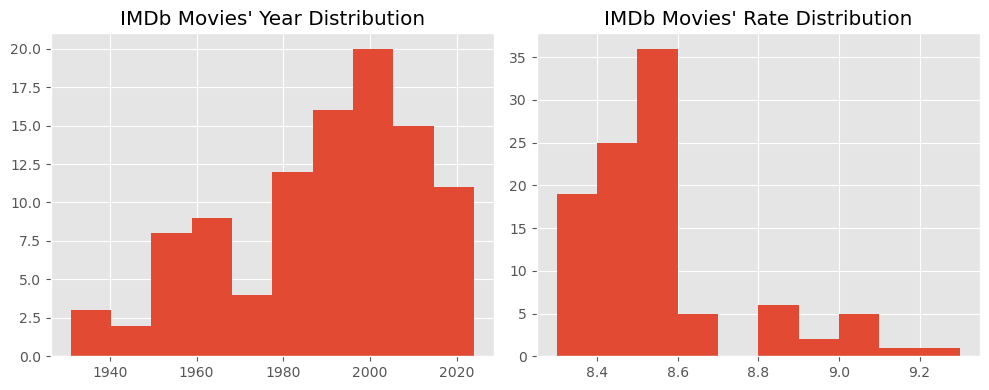

In [185]:
# Data Distribution for numerical attributes

fig, axs = plt.subplots(ncols = 2, figsize = (10, 4))

for i, ax in enumerate(axs):
    df_dir_100.iloc[:, i+2].plot.hist(ax = ax)
    ax.set_ylabel('')
    ax.set_title(f"IMDb Movies' {df_dir_100.columns[i+2].title()} Distribution")

plt.tight_layout()
plt.show()

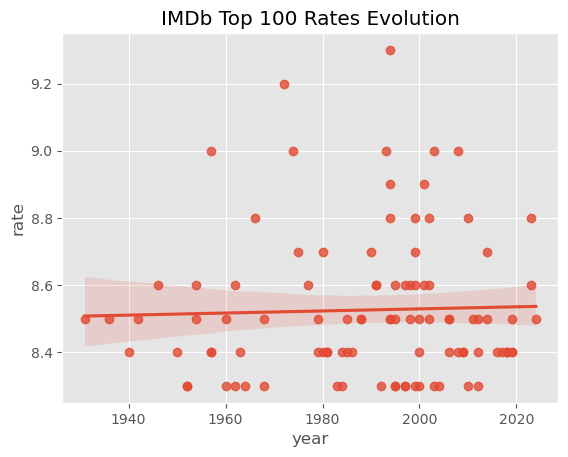

In [186]:
# Rate evolution

sns.regplot(data = df_dir_100, x = 'year', y = 'rate')
plt.title('IMDb Top 100 Rates Evolution')
plt.show()

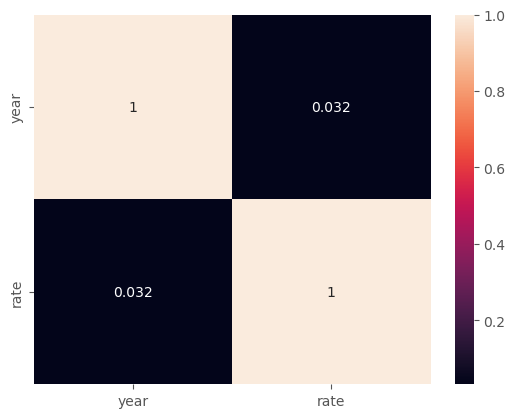

In [187]:
# Correlation heatmap between release year and movies' rate

sns.heatmap(data = df_dir_100[['year', 'rate']].corr(), annot = True)
plt.show()

In [188]:
# Creating a new column for release period

df_dir_100['release_period'] = df_dir_100.year.map(lambda cell: 'Before 2000' if cell < 2000
                                                      else 'Since 2000')
df_dir_100

,title,director,year,rate,release_period
0,The Shawshank Redemption,Frank Darabont,1994,9.3,Before 2000
1,The Godfather,Francis Ford Coppola,1972,9.2,Before 2000
2,The Dark Knight,Christopher Nolan,2008,9.0,Since 2000
3,The Godfather Part II,Francis Ford Coppola,1974,9.0,Before 2000
4,12 Angry Men,Sidney Lumet,1957,9.0,Before 2000
...,...,...,...,...,...
95,2001: A Space Odyssey,Stanley Kubrick,1968,8.3,Before 2000
96,Ikiru,Akira Kurosawa,1952,8.3,Before 2000
97,Reservoir Dogs,Quentin Tarantino,1992,8.3,Before 2000
98,Lawrence of Arabia,David Lean,1962,8.3,Before 2000


In [189]:
# Counts of directors

df_dir_count = df_dir_100.loc[:, ['director', 'release_period']].value_counts().reset_index()
df_dir_count

,director,release_period,count
0,Christopher Nolan,Since 2000,6
1,Stanley Kubrick,Before 2000,4
2,Akira Kurosawa,Before 2000,3
3,Sergio Leone,Before 2000,3
4,Billy Wilder,Before 2000,3
...,...,...,...
63,Jonathan Demme,Before 2000,1
64,Lana Wachowski,Before 2000,1
65,Makoto Shinkai,Since 2000,1
66,Martin Scorsese,Before 2000,1


In [190]:
# Top 15 directors in terms of appearence

df_dir_count_15 = df_dir_100.loc[:, ['director', 'release_period']].value_counts().iloc[:15].unstack()
df_dir_count_15

release_period,Before 2000,Since 2000
director,,
Christopher Nolan,NaN,6.0
Stanley Kubrick,4.0,NaN
Akira Kurosawa,3.0,NaN
Sergio Leone,3.0,NaN
Billy Wilder,3.0,NaN
Charles Chaplin,3.0,NaN
Steven Spielberg,3.0,NaN
Francis Ford Coppola,3.0,NaN
Peter Jackson,NaN,3.0


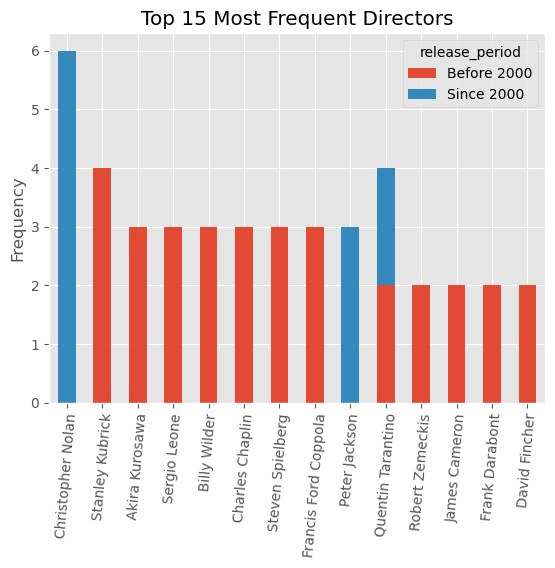

In [193]:
# Directors frequency 

df_dir_count_15.plot.bar(stacked = True)
plt.xlabel('')
plt.ylabel('Frequency')
plt.xticks(rotation = 85)
plt.title('Top 15 Most Frequent Directors')
plt.show()

In [205]:
# Top 15 Directors

df_dir_100.loc[:, ['director', 'rate']].groupby('director').mean().sort_values('rate', ascending = False).iloc[:15]

,rate
director,
Sidney Lumet,9.000000
Frank Darabont,8.950000
Peter Jackson,8.900000
Francis Ford Coppola,8.866667
Vidhu Vinod Chopra,8.800000
Irvin Kershner,8.700000
Lana Wachowski,8.700000
David Fincher,8.700000
Steven Spielberg,8.666667


## Statistical Modeling

In [312]:
# Splittind data into predictors and dependent set (one-hot encoding included)

X, y = df_dir_100.director, df_dir_100.rate.values
X_ohe = pd.get_dummies(X, drop_first = True).astype(float)
X_ohe

,Alfred Hitchcock,Andrew Stanton,Anthony Russo,Billy Wilder,Bob Persichetti,Bong Joon Ho,Bryan Singer,Charles Chaplin,Christopher Nolan,Damien Chazelle,...,Sergio Leone,Sidney Lumet,Stanley Donen,Stanley Kubrick,Steven Spielberg,Thomas Vinterberg,Todd Phillips,Tony Kaye,Vidhu Vinod Chopra,Wolfgang Petersen
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [313]:
# Adding a constant term (intercept), fitting the model, and presenting the summary

X_ohe = sm.add_constant(X_ohe)
model = sm.OLS(y, X_ohe).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                 -0.033
Method:                 Least Squares   F-statistic:                    0.9491
Date:                Fri, 25 Oct 2024   Prob (F-statistic):              0.581
Time:                        11:11:12   Log-Likelihood:                 61.956
No. Observations:                 100   AIC:                             4.088
Df Residuals:                      36   BIC:                             170.8
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                8.4333      0.125     67.301      0.000       8.179       8.687
Alfred Hitchcock                     0.0667      0.198      0.336      0.738      -0.335       0.468
Andrew Stanton                      -0.0333      0.251     -0.133      0.895      -0.542       0.475
Anthony Russo                       -0.0333      0.198     -0.168      0.867      -0.435       0.368
Billy Wilder                        -0.0667      0.177     -0.376      0.709      -0.426       0.293
Bob Persichetti                     -0.0333      0.251     -0.133      0.895      -0.542       0.475
Bong Joon Ho                         0.0667      0.251      0.266      0.792      -0.442       0.575
Bryan Singer                         0.0667      0.251      0.266      0.792      -0.442       0.575
Charles Chaplin                      0.0333      0.177      0.188      0.852      -0.326       0.393
Christopher Nolan                    0.2000      0.153      1.303      0.201      -0.111       0.511
Damien Chazelle                      0.0667      0.251      0.266      0.792      -0.442       0.575
Darren Aronofsky                    -0.1333      0.251     -0.532      0.598      -0.642       0.375
David Fincher                        0.2667      0.198      1.346      0.187      -0.135       0.668
David Lean                          -0.1333      0.251     -0.532      0.598      -0.642       0.375
Denis Villeneuve                     0.0667      0.251      0.266      0.792      -0.442       0.575
Elem Klimov                         -0.0333      0.251     -0.133      0.895      -0.542       0.475
Fernando Meirelles                   0.1667      0.251      0.665      0.510      -0.342       0.675
Florian Henckel von Donnersmarck    -0.0333      0.251     -0.133      0.895      -0.542       0.475
Francis Ford Coppola                 0.4333      0.177      2.445      0.019       0.074       0.793
Frank Capra                          0.1667      0.251      0.665      0.510      -0.342       0.675
Frank Darabont                       0.5167      0.198      2.608      0.013       0.115       0.918
George Lucas                         0.1667      0.251      0.665      0.510      -0.342       0.675
Giuseppe Tornatore                   0.0667      0.251      0.266      0.792      -0.442       0.575
Gus Van Sant                        -0.1333      0.251     -0.532      0.598      -0.642       0.375
Hayao Miyazaki                       0.0167      0.198      0.084      0.933      -0.385       0.418
Irvin Kershner                       0.2667      0.251      1.064      0.294      -0.242       0.775
Isao Takahata                        0.0667      0.251      0.266      0.792      -0.442       0.575
James Cameron                        0.0667      0.19

In [315]:
# Checking significant attributes

sig_vals = model.pvalues.to_frame(name = 'p_value').query("p_value <= 0.05")
sig_vals

,p_value
const,1.841854e-39
Francis Ford Coppola,1.949651e-02
Frank Darabont,1.318439e-02
Peter Jackson,1.238016e-02
Sidney Lumet,2.989380e-02


In [318]:
# Predictors set containing the most significant attributes

X_sig = X_ohe[sig_vals.index]
X_sig

,const,Francis Ford Coppola,Frank Darabont,Peter Jackson,Sidney Lumet
0,1.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
95,1.0,0.0,0.0,0.0,0.0
96,1.0,0.0,0.0,0.0,0.0
97,1.0,0.0,0.0,0.0,0.0
98,1.0,0.0,0.0,0.0,0.0


In [320]:
# Fitting the model with significant attributes

X_sig_const = sm.add_constant(X_sig)
model_sig = sm.OLS(y, X_sig_const).fit()
model_sig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     11.64
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           9.86e-08
Time:                        11:21:02   Log-Likelihood:                 32.963
No. Observations:                 100   AIC:                            -55.93
Df Residuals:                      95   BIC:                            -42.90
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.4879      0.019    453.502      0.000       8.451       8.525
Francis Ford Coppola     0.3788      0.105      3.615      0.000       0.171       0.587
Frank Darabont           0.4621      0.128      3.621      0.000       0.209       0.715
Peter Jackson            0.4121      0.105      3.933      0.000       0.204       0.620
Sidney Lumet             0.5121      0.180      2.853      0.005       0.156       0.868
==============================================================================
Omnibus:                        9.610   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.541
Skew:                           0.665   Prob(JB):                      0.00848
Kurtosis:                       3.721   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                 ________  ________   _______   ______
                 /_  __/ / / / ____/  / ____/ | / / __ \
                  / / / /_/ / __/    / __/ /  |/ / / / /
                 / / / __  / /___   / /___/ /|  / /_/ /
                /_/ /_/ /_/_____/  /_____/_/ |_/_____/  
